In [1]:
%cd /content/drive/MyDrive/Paper

/content/drive/MyDrive/Paper


In [ ]:
!pip install ultralytics

In [ ]:
!wget https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8x-cls.pt

In [6]:
import os
import random
import cv2
import numpy as np

from sklearn.model_selection import train_test_split


In [2]:
Data_path = '/content/drive/MyDrive/Paper/Structure_data'

In [7]:
def read_image(path):
    images = []
    labels = []

    for label, class_name in enumerate(os.listdir(path)):
        for image_name in os.listdir(os.path.join(path, class_name)):
            image = cv2.imread(os.path.join(path, class_name, image_name))
            image = cv2.resize(image, (224, 224))
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

data_folder = '/content/drive/MyDrive/Paper/Data'
images, labels = read_image(data_folder)

In [8]:

def split_data(image, labels, val_ratio, test_ratio):
    # Split the dataset into train, validation, and test sets
    train_images, val_test_images, train_labels, val_test_labels = train_test_split(image, labels, test_size=val_ratio+test_ratio, shuffle=True, random_state=42)
    val_images, test_images, val_labels, test_labels = train_test_split(val_test_images, val_test_labels, test_size=(test_ratio/(val_ratio+test_ratio)), shuffle=True, random_state=42)
    return train_images, val_images, test_images, train_labels, val_labels, test_labels

In [9]:
train_images, val_images, test_images, train_labels, val_labels, test_labels = split_data(images, labels, 0.151, 0.151)


In [10]:
def save_structure_data(data_path, train_images, val_images, test_images, train_labels, val_labels, test_labels):
    # Create train, val, and test folders
    train_path = os.path.join(data_path, 'train')
    val_path = os.path.join(data_path, 'val')
    test_path = os.path.join(data_path, 'test')
    os.makedirs(train_path, exist_ok=True)
    os.makedirs(val_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

    # Move the images to the corresponding class directories in the train folder
    for image, label in zip(train_images, train_labels):
        class_folder = os.path.join(train_path, str(label))
        os.makedirs(class_folder, exist_ok=True)
        image_name = f"{label}_{random.randint(0, 100000)}.jpg"
        image_path = os.path.join(class_folder, image_name)
        cv2.imwrite(image_path, image)

    # Move the images to the corresponding class directories in the validation folder
    for image, label in zip(val_images, val_labels):
        class_folder = os.path.join(val_path, str(label))
        os.makedirs(class_folder, exist_ok=True)
        image_name = f"{label}_{random.randint(0, 100000)}.jpg"
        image_path = os.path.join(class_folder, image_name)
        cv2.imwrite(image_path, image)

    # Move the images to the corresponding class directories in the test folder
    for image, label in zip(test_images, test_labels):
        class_folder = os.path.join(test_path, str(label))
        os.makedirs(class_folder, exist_ok=True)
        image_name = f"{label}_{random.randint(0, 100000)}.jpg"
        image_path = os.path.join(class_folder, image_name)
        cv2.imwrite(image_path, image)

    print("Data split and moved successfully!")


In [11]:
data_structure = '/content/drive/MyDrive/Paper/Structure_data'
save_structure_data(data_structure, train_images, val_images, test_images, train_labels, val_labels, test_labels )

Data split and moved successfully!


In [12]:
from ultralytics import YOLO

model = YOLO("yolov8x-cls.pt")
results = model.train(data = Data_path, epochs = 20, imgsz = 224)

Ultralytics YOLOv8.1.40 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8x-cls.pt, data=/content/drive/MyDrive/Paper/Structure_data, epochs=20, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

train: Scanning /content/drive/MyDrive/Paper/Structure_data/train... 2074 images, 0 corrupt: 100%|██████████| 2074/2074 [00:14<00:00, 140.38it/s]


train: New cache created: /content/drive/MyDrive/Paper/Structure_data/train.cache


val: Scanning /content/drive/MyDrive/Paper/Structure_data/val... 450 images, 0 corrupt: 100%|██████████| 450/450 [00:03<00:00, 137.57it/s]


val: New cache created: /content/drive/MyDrive/Paper/Structure_data/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train2
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/20      2.68G      1.079         16        224:   5%|▍         | 6/130 [00:02<00:32,  3.85it/s]

       1/20      2.68G      1.075         16        224:   9%|▉         | 12/130 [00:03<00:22,  5.23it/s]
100%|██████████| 755k/755k [00:00<00:00, 17.8MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:02<00:00,  5.04it/s]

                   all      0.936          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:02<00:00,  5.57it/s]

                   all      0.887          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:03<00:00,  4.58it/s]

                   all      0.918          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:02<00:00,  5.11it/s]

                   all      0.927          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:02<00:00,  5.70it/s]

                   all      0.933          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:03<00:00,  4.83it/s]

                   all      0.938          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:02<00:00,  5.22it/s]

                   all      0.933          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:02<00:00,  5.54it/s]

                   all      0.951          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:04<00:00,  3.62it/s]

                   all      0.956          1



      Epoch    GPU_mem       loss  Instances       Size


      10/20      2.59G    0.06967         10        224: 100%|██████████| 130/130 [00:29<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:02<00:00,  5.61it/s]

                   all      0.958          1



      Epoch    GPU_mem       loss  Instances       Size


      11/20      2.64G    0.06024         10        224: 100%|██████████| 130/130 [00:30<00:00,  4.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:02<00:00,  5.33it/s]

                   all      0.949          1



      Epoch    GPU_mem       loss  Instances       Size


      12/20      2.65G    0.06379         10        224: 100%|██████████| 130/130 [00:28<00:00,  4.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:02<00:00,  5.48it/s]

                   all      0.956          1



      Epoch    GPU_mem       loss  Instances       Size


      13/20      2.67G    0.04666         10        224: 100%|██████████| 130/130 [00:27<00:00,  4.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:03<00:00,  3.83it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


      14/20      2.59G    0.04508         10        224: 100%|██████████| 130/130 [00:29<00:00,  4.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:02<00:00,  5.25it/s]

                   all      0.962          1



      Epoch    GPU_mem       loss  Instances       Size


      15/20      2.64G    0.03477         10        224: 100%|██████████| 130/130 [00:29<00:00,  4.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:03<00:00,  4.28it/s]

                   all      0.962          1



      Epoch    GPU_mem       loss  Instances       Size


      16/20      2.65G    0.02281         10        224: 100%|██████████| 130/130 [00:29<00:00,  4.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:02<00:00,  5.52it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


      17/20      2.67G    0.03124         10        224: 100%|██████████| 130/130 [00:27<00:00,  4.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      18/20      2.59G    0.01796         10        224: 100%|██████████| 130/130 [00:29<00:00,  4.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:02<00:00,  5.63it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


      19/20      2.64G    0.02092         10        224: 100%|██████████| 130/130 [00:27<00:00,  4.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:03<00:00,  3.93it/s]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


      20/20      2.65G    0.01561         10        224: 100%|██████████| 130/130 [00:28<00:00,  4.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:02<00:00,  5.77it/s]

                   all      0.976          1



20 epochs completed in 0.200 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 112.5MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 112.5MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics YOLOv8.1.40 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-cls summary (fused): 133 layers, 56127043 parameters, 0 gradients, 153.8 GFLOPs
train: /content/drive/MyDrive/Paper/Structure_data/train... found 2074 images in 3 classes ✅ 
val: /content/drive/MyDrive/Paper/Structure_data/val... found 450 images in 3 classes ✅ 
test: /content/drive/MyDrive/Paper/Structure_data/test... found 450 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:03<00:00,  4.32it/s]


                   all       0.98          1
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2
Results saved to runs/classify/train2


Text(0.5, 0, 'epochs')

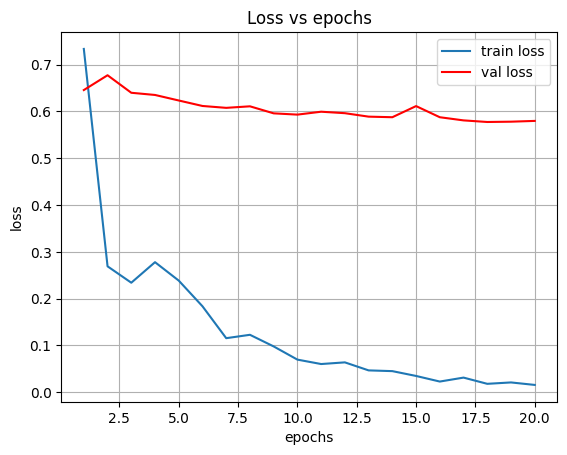

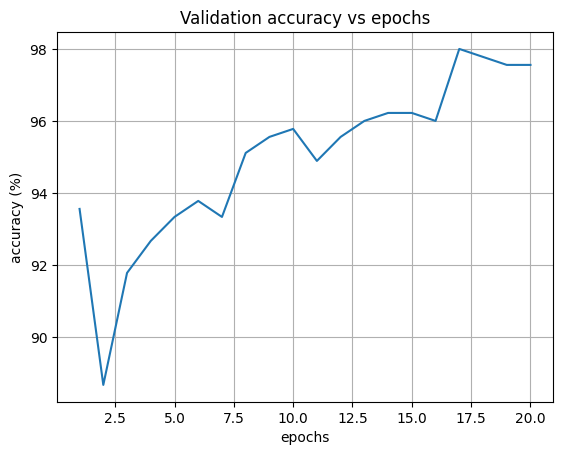

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

results_path = '/content/drive/MyDrive/Paper/runs/classify/train2/results.csv'

# Read the results file
results_df = pd.read_csv(results_path)

results = pd.read_csv(results_path)

plt.figure()
plt.plot(results['                  epoch'], results['             train/loss'], label='train loss')
plt.plot(results['                  epoch'], results['               val/loss'], label='val loss', c='red')
plt.grid()
plt.title('Loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()


plt.figure()
plt.plot(results['                  epoch'], results['  metrics/accuracy_top1'] * 100)
plt.grid()
plt.title('Validation accuracy vs epochs')
plt.ylabel('accuracy (%)')
plt.xlabel('epochs')
